# Homework 2 - Data from the Web

# Task 1 - QS World Universities ranking

### Importing libs

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


import requests
from bs4 import BeautifulSoup
import difflib

import json

## Extracting data from the website "topuniversities.com"

The aim of the first task is to scrape meaningful data from _topuniversities.com_ website.
To begin with, we analyze the content and the interaction with the html table on the website. 

![alt text](./images/postman.png "Postman capture")


By analyzing all the REST request loaded by the page we found that the dataset that fills the table is obtained by a GET request to a specific URL in a .txt format.

Analyzing the file we see that the content is stored in a JSON format. Now, we know that we can perform the same request and store the file in a json object that can be used to create our pandas dataframe.

In [2]:
default_path = 'https://www.topuniversities.com'
r = requests.get(default_path +'/sites/default/files/qs-rankings-data/357051.txt?_=1507995842896')
result_json = r.json()

result = pd.DataFrame.from_dict(result_json['data']).head(200)

In [3]:
result

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge
5,GB,478,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294654,6,Europe,95.3,5,University of Oxford,/universities/university-oxford
6,GB,365,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294014,7,Europe,94.6,None,UCL (University College London),/universities/ucl-university-college-london
7,GB,356,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294030,8,Europe,93.7,None,Imperial College London,/universities/imperial-college-london
8,US,120,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294536,9,North America,93.5,5,University of Chicago,/universities/university-chicago
9,CH,201,Switzerland,"<a href=""/where-to-study/europe/switzerland/gu...","<img src=""https://www.topuniversities.com/site...",294432,10,Europe,93.3,None,ETH Zurich - Swiss Federal Institute of Techno...,/universities/eth-zurich-swiss-federal-institu...


## Renaming the columns
In a subsequent task we have to merge this dataframe with another one coming from a different website. So we add the postfix *TU* (for Top Universities) to all column names:

In [4]:
new_columns =['CC TU','Core_id TU','Country TU','Guide TU','Logo TU','Nid TU','Rank TU','Region TU','Score TU',
             'Stars TU','Title TU','url TU']
result.columns = new_columns

## Scrape details from the details page of each University
In the original JSON object that we saved in our dataframe there is a column called _url_ that specifies the relative path to every University webpage, where we can find the needed details.

Steps to get the details for each University:
1. Request the webpage and parse it with BeautifulSoup.
2. Find the HTML elements that contain the details we need to scrape.
3. It's possible that some Universities don't contain values.
    4. Our approach is to catch possible exceptions and print where we register the error (and link to the website).
4. We add the new values to the main dataframe

In [5]:
for index, row in result.iterrows():
        r_ = requests.get(default_path + result.iloc[index]['url TU'])
        soup = BeautifulSoup(r_.text, 'html.parser')
        university = result.iloc[index]['Title TU']
        try:
            total_faculty = soup.find('div', class_='total faculty')
            result.loc[index, 'Staff total number TU'] = int(total_faculty.find('div', class_='number').text.split()[0].replace(',', ''))
        except:
            print(university + ' has no values for TOTAL_STAFF') 
            print("Check at: " + default_path + result.iloc[index]['url TU'])
        try:
            total_student = soup.find('div', class_='total student')
            result.loc[index, 'Students total number TU'] = int(total_student.find('div', class_='number').text.split()[0].replace(',', ''))
        except:
            print(university + ' has no values for TOTAL_STUDENTS')
            print("Check at: " + default_path + result.iloc[index]['url TU'])
        try:
            inter_faculty = soup.find('div', class_='inter faculty')
            result.loc[index, 'International Staff number TU'] = int(inter_faculty.find('div', class_='number').text.split()[0].replace(',', ''))
        except:
            print(university + ' has no values for INTERNATIONAL_STAFF')
            print("Check at: " + default_path + result.iloc[index]['url TU'])
        try:
            inter_student = soup.find('div', class_='total inter')
            result.loc[index, 'International Students number TU'] = int(inter_student.find('div', class_='number').text.split()[0].replace(',', ''))
        except:
            print(university + ' has no values for INTERNATIONAL_STUDENTS')
            print("Check at: " + default_path + result.iloc[index]['url TU'])

New York University (NYU) has no values for TOTAL_STAFF
Check at: https://www.topuniversities.com/universities/new-york-university-nyu
New York University (NYU) has no values for TOTAL_STUDENTS
Check at: https://www.topuniversities.com/universities/new-york-university-nyu
New York University (NYU) has no values for INTERNATIONAL_STAFF
Check at: https://www.topuniversities.com/universities/new-york-university-nyu
New York University (NYU) has no values for INTERNATIONAL_STUDENTS
Check at: https://www.topuniversities.com/universities/new-york-university-nyu
Indian Institute of Science (IISc) Bangalore has no values for INTERNATIONAL_STAFF
Check at: https://www.topuniversities.com/universities/indian-institute-science-iisc-bangalore


### Dealing with NaN values

We choose to store absent values as NaN, in order to not modify relations between countries and regions.

### Fixing duplicate ranks
In the first dataframe it is possible to have universities with equal rank. We decided to break those ties before we start the analysis using the order in which the universities are written on the website.

In [6]:
result['Rank TU'] = range(1,201)

### Removing useless columns
We remove the columns that we consider meaningless for our analysis goals from the dataset:

In [7]:
results = result.copy()
useless_columns = ['Score TU','Stars TU','CC TU','Core_id TU','Guide TU','Nid TU','url TU','Logo TU']
for column_name in useless_columns:
    del result[column_name]

In [8]:
df = result.copy()

## Extracting ratios between new values
With the new columns that we have scraped from the website we can produce the ratio between:
- Staff total number / Students total number
- International students number / Students total number

In [9]:
df['Ratio Staff/Student TU']=df['Staff total number TU']/df['Students total number TU']
df['Ratio International Students TU']=df['International Students number TU']/df['Students total number TU']

### Sorting dataframes by ratios
We sort the dataframes by ratios:

In [10]:
df_international = df.sort_values('Ratio International Students TU', ascending=0)
df_staffstud = df.sort_values('Ratio Staff/Student TU', ascending=0)

In [11]:
df_international.head(3)

,Country TU,Rank TU,Region TU,Title TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Ratio Staff/Student TU,Ratio International Students TU
34,United Kingdom,35,Europe,London School of Economics and Political Scien...,1088.0,9760.0,687.0,6748.0,0.111475,0.691393
11,Switzerland,12,Europe,Ecole Polytechnique Fédérale de Lausanne (EPFL),1695.0,10343.0,1300.0,5896.0,0.163879,0.570047
7,United Kingdom,8,Europe,Imperial College London,3930.0,16090.0,2071.0,8746.0,0.244251,0.543567


In [12]:
df_staffstud.head(3)

,Country TU,Rank TU,Region TU,Title TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU,Ratio Staff/Student TU,Ratio International Students TU
3,United States,4,North America,California Institute of Technology (Caltech),953.0,2255.0,350.0,647.0,0.422616,0.286918
15,United States,16,North America,Yale University,4940.0,12402.0,1708.0,2469.0,0.398323,0.199081
5,United Kingdom,6,Europe,University of Oxford,6750.0,19720.0,2964.0,7353.0,0.342292,0.372870


### Deleting useless columns before grouping by Country and Region
We delete the useless columns before grouping:

In [13]:
df_international_by_country_or_region = df_international.copy()
other_useless_columns = ['Rank TU','Ratio International Students TU','Ratio Staff/Student TU','Title TU']
for useless_column in other_useless_columns:
    del df_international_by_country_or_region[useless_column]
df_international_by_country_or_region.head(5)

,Country TU,Region TU,Staff total number TU,Students total number TU,International Staff number TU,International Students number TU
34,United Kingdom,Europe,1088.0,9760.0,687.0,6748.0
11,Switzerland,Europe,1695.0,10343.0,1300.0,5896.0
7,United Kingdom,Europe,3930.0,16090.0,2071.0,8746.0
198,Netherlands,Europe,1277.0,16385.0,502.0,8234.0
47,United States,North America,1342.0,13356.0,425.0,6385.0


### Extracting the number of Universities classified in the ranking, grouped by Country
For further analysis in Task 4 we store how many universities are in the top 200 universities, grouped by country:

In [14]:
df_international_by_country_count = df_international_by_country_or_region.groupby(['Country TU']).count()
col_totals = ['Staff total number TU','Students total number TU','International Staff number TU','International Students number TU']
for c in col_totals:
    del df_international_by_country_count[c]
df_international_by_country_count.columns = ['Number of Universities per country']
df_international_by_country_count = df_international_by_country_count.sort_values('Number of Universities per country', ascending=0)

## Grouping by country and Region

In [15]:
df_international_by_country = df_international_by_country_or_region.groupby(['Country TU']).sum()
df_international_by_region = df_international_by_country_or_region.groupby(['Region TU']).sum()

### Producing ratios by country

In [16]:
df_international_by_country['Ratio Staff/Student TU'] = df_international_by_country['Staff total number TU']/df_international_by_country['Students total number TU']
df_international_by_country['Ratio International Students TU'] = df_international_by_country['International Students number TU']/df_international_by_country['Students total number TU']

In [17]:
df_international_by_country_staffstudent = df_international_by_country.copy()
df_ics = df_international_by_country_staffstudent.sort_values('Ratio Staff/Student TU', ascending=0).head(25)

In [18]:
df_international_by_country_intstudent = df_international_by_country.copy()
df_ici = df_international_by_country_intstudent.sort_values('Ratio International Students TU', ascending=0).head(25)

### Producing ratios by region

In [19]:
df_international_by_region['Ratio Staff/Student TU'] = df_international_by_region['Staff total number TU']/df_international_by_region['Students total number TU']
df_international_by_region['Ratio International Students TU'] = df_international_by_region['International Students number TU']/df_international_by_region['Students total number TU']

#### Ratios STAFF/STUDENT

In [20]:
df_international_by_region_staffstudent = df_international_by_region.copy()
df_irs = df_international_by_region_staffstudent.sort_values('Ratio Staff/Student TU', ascending=0).head(5)

#### Ratios INTERNATIONAL/TOTAL students

In [21]:
df_international_by_region_intstudent = df_international_by_region.copy()
df_iri = df_international_by_region_intstudent.sort_values('Ratio International Students TU', ascending=0).head(5)

### Extracting the countries and their corresponding regions to be used  for mapping in task 2 

In [22]:
country_region = df_international.filter(['Country TU','Region TU'], axis=1)

In [23]:
unique_country_region = country_region.drop_duplicates(subset = 'Country TU')

In [24]:
country_region_dict = unique_country_region.set_index('Country TU')['Region TU'].to_dict()

In [25]:
country_region_dict

{'Argentina': 'Latin America',
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Belgium': 'Europe',
 'Brazil': 'Latin America',
 'Canada': 'North America',
 'Chile': 'Latin America',
 'China': 'Asia',
 'Denmark': 'Europe',
 'Finland': 'Europe',
 'France': 'Europe',
 'Germany': 'Europe',
 'Hong Kong': 'Asia',
 'India': 'Asia',
 'Ireland': 'Europe',
 'Israel': 'Asia',
 'Italy': 'Europe',
 'Japan': 'Asia',
 'Malaysia': 'Asia',
 'Mexico': 'Latin America',
 'Netherlands': 'Europe',
 'New Zealand': 'Oceania',
 'Norway': 'Europe',
 'Russia': 'Europe',
 'Saudi Arabia': 'Asia',
 'Singapore': 'Asia',
 'South Africa': 'Africa',
 'South Korea': 'Asia',
 'Spain': 'Europe',
 'Sweden': 'Europe',
 'Switzerland': 'Europe',
 'Taiwan': 'Asia',
 'United Kingdom': 'Europe',
 'United States': 'North America'}

### Cross comparing this list with all the countries in Task 2 dataframe, only 2 countries are missing:
    1- Russian Federation - > Europe
    2- Luxembourg - > Europe
#### Now we need to add them to the dictionary to avoid NaN values in the region field in the Task 2 dataframe.

In [26]:
country_region_dict['Russian Federation'] = 'Europe'
country_region_dict['Luxembourg'] = 'Europe'

## Plots

We previously saved the best five universities given the four ratios. In this section we plot the dataframes.

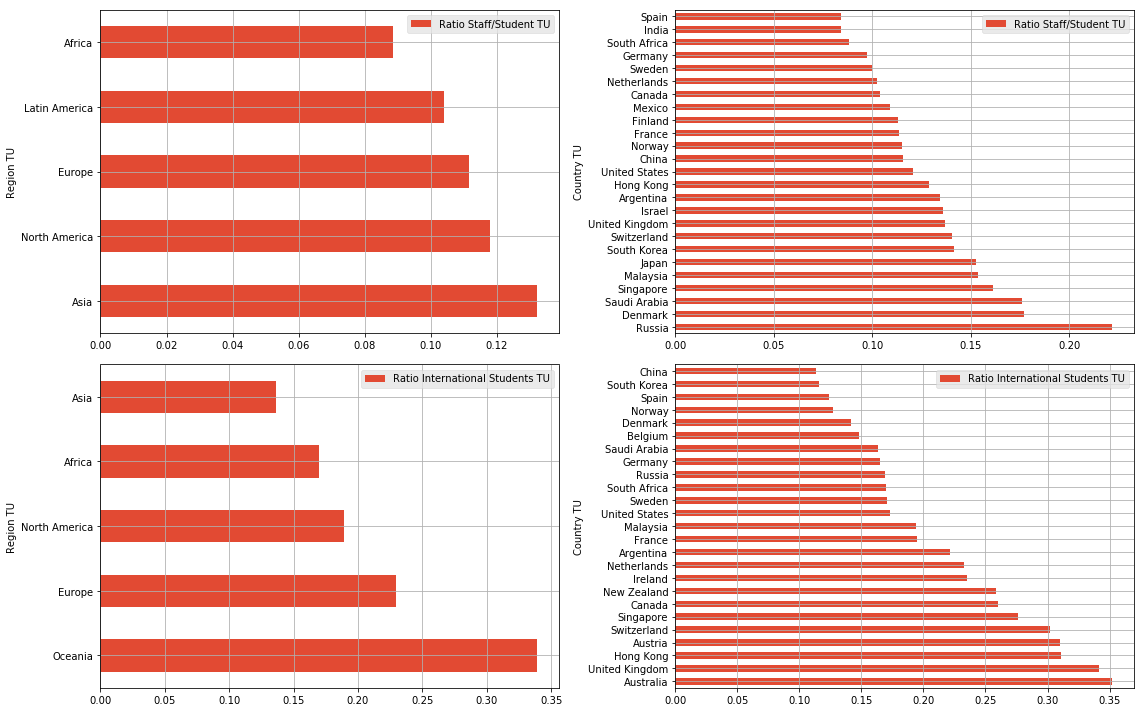

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[16,10])
plt.style.use('ggplot')

plot_useless_columns = ['Staff total number TU','Students total number TU','International Staff number TU','International Students number TU']
for useless_column in plot_useless_columns:
    del df_iri[useless_column]
    del df_ici[useless_column]
    del df_ics[useless_column]
    del df_irs[useless_column]

del df_iri['Ratio Staff/Student TU']
del df_ici['Ratio Staff/Student TU']
del df_irs['Ratio International Students TU']
del df_ics['Ratio International Students TU']

df_irs.plot(ax=axes[0,0], kind='barh')
df_ics.plot(ax=axes[0,1], kind='barh')
df_iri.plot(ax=axes[1,0], kind='barh')
df_ici.plot(ax=axes[1,1], kind='barh')
plt.tight_layout()
plt.show()

Those plots show the ratios for countries and regions. Note that the ratios are only based on the universities which made it to the top 200, and that the result therefore might look very different if all universities of a country were taken into account.

# Task 2 - Times Higher Education ranking

## Extracting data from the website "www.timeshighereducation.com"

![alt text](./images/postman_2.png "Postman capture")


By analyzing all the REST request loaded by the page we found that the dataset that fills the table is obtained by a GET request to a specific URL in a .json format.

In [28]:
default_path_2 = 'https://www.timeshighereducation.com'
r_2 = requests.get(default_path_2 +'/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
result_json_2 = r_2.json()

result_2 = pd.DataFrame.from_dict(result_json_2['data']).head(200)

In [29]:
result_2.head()

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,...,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url
0,University of Oxford,United Kingdom,0,University of Oxford,468,1,10,master_account,99.1,15,...,99.5,1,86.7,5,46 : 54,"20,409",38%,11.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-oxford
1,University of Cambridge,United Kingdom,0,University of Cambridge,470,2,20,master_account,97.5,29,...,97.8,3,87.8,3,45 : 55,"18,389",35%,10.9,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/university-cambridge
2,California Institute of Technology caltech,United States,0,California Institute of Technology,128779,=3,30,private,99.5,10,...,97.5,4,90.3,1,31 : 69,"2,209",27%,6.5,"Architecture,Biological Sciences,Business & Ma...",/world-university-rankings/california-institut...
3,Stanford University,United States,11,Stanford University,467,=3,40,private,99.9,4,...,96.7,5,89.1,2,42 : 58,"15,845",22%,7.5,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/stanford-university
4,Massachusetts Institute of Technology,United States,0,Massachusetts Institute of Technology,471,5,50,private,100.0,1,...,91.9,9,87.3,4,37 : 63,"11,177",34%,8.7,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/massachusetts-insti...


## Deleting useless columns

Removing columns that are of no use to us.

In [30]:
useless_columns_2 = ['aliases','rank_order','scores_overall_rank','scores_teaching_rank','scores_research_rank',
                     'scores_citations','scores_citations_rank','scores_industry_income','scores_industry_income_rank',
                    'scores_international_outlook','scores_international_outlook_rank','record_type','member_level',
                    'nid','subjects_offered','url']
for column_name in useless_columns_2:
    del result_2[column_name]

In [31]:
result_2.head()

,location,name,rank,scores_overall,scores_research,scores_teaching,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio
0,United Kingdom,University of Oxford,1,94.3,99.5,86.7,46 : 54,"20,409",38%,11.2
1,United Kingdom,University of Cambridge,2,93.2,97.8,87.8,45 : 55,"18,389",35%,10.9
2,United States,California Institute of Technology,=3,93.0,97.5,90.3,31 : 69,"2,209",27%,6.5
3,United States,Stanford University,=3,93.0,96.7,89.1,42 : 58,"15,845",22%,7.5
4,United States,Massachusetts Institute of Technology,5,92.5,91.9,87.3,37 : 63,"11,177",34%,8.7


### Using similar column names as task 1
Every column header extracted from TimesHigherEducation website will contain the word THE 

In [32]:
new_columns =['Country THE', 'Title THE', 'Rank THE','Scores overall THE', 'Score research THE', 'Score teaching THE',
       'Ratio Female/Male THE', 'Students total number THE',
       'Ratio of International students THE', 'Ratio Student/Staff THE']
result_2.columns = new_columns

### Changing string type into int/float type

In [33]:
result_2.dtypes

Country THE                            object
Title THE                              object
Rank THE                               object
Scores overall THE                     object
Score research THE                     object
Score teaching THE                     object
Ratio Female/Male THE                  object
Students total number THE              object
Ratio of International students THE    object
Ratio Student/Staff THE                object
dtype: object

### Some of the data needs to be extracted from existing columns
    1- The total number of international students is computed by multiplying the the ratio of international students and the number of total students.
    2- The Staff total number is computed by dividing the total number of students by the student/staff ratio.

In [34]:
for i in range(len(result_2)):
    result_2['Ratio of International students THE'][i] = float(result_2['Ratio of International students THE'][i].strip('%'))/100
    result_2['Ratio Student/Staff THE'][i] = float(result_2['Ratio Student/Staff THE'][i])
    result_2['Students total number THE'][i] = int(result_2['Students total number THE'][i].split()[0].replace(',', ''))

result_2['Ratio of International students THE'] = result_2['Ratio of International students THE'].astype('float')
result_2['Ratio Student/Staff THE'] = result_2['Ratio Student/Staff THE'].astype('float')
result_2['International Students number THE'] = (result_2['Ratio of International students THE']*result_2['Students total number THE']).astype('int') 
result_2['Students total number THE'] = result_2['Students total number THE'].astype('int')
result_2['Staff total number THE'] = (result_2['Students total number THE']/result_2['Ratio Student/Staff THE']).astype('int')
result_2['Score research THE'] = result_2['Score research THE'].astype('float')
result_2['Score teaching THE'] = result_2['Score teaching THE'].astype('float')
result_2['Scores overall THE'] = result_2['Scores overall THE'].astype('float')
result_2.dtypes

#Note thet the type of the rank will be changed later.

Country THE                             object
Title THE                               object
Rank THE                                object
Scores overall THE                     float64
Score research THE                     float64
Score teaching THE                     float64
Ratio Female/Male THE                   object
Students total number THE                int64
Ratio of International students THE    float64
Ratio Student/Staff THE                float64
International Students number THE        int64
Staff total number THE                   int64
dtype: object

## Fixing duplicate ranks by reassembling the order
Some of the universities in our ranking are in a tie, we resolve it by using the order defined in the webpage

In [35]:
result_2['Rank THE'] = range(1,201)

### Below we will answer the first question by comparing the ratio between faculty members and students alongside the ratio of international students for each university

The ratio of international students is already extracted from the JSON.

## Ratio of international students
Sorting the dataframe by ratio of international students and displaying first 5 elements.

In [36]:
df_international_2 = result_2.sort_values('Ratio of International students THE', ascending=0)

In [37]:
df_international_2.set_index('Title THE').head()

,Country THE,Rank THE,Scores overall THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,International Students number THE,Staff total number THE
Title THE,,,,,,,,,,,
London School of Economics and Political Science,United Kingdom,25,79.4,72.0,71.8,52 : 48,10065,0.71,12.2,7146,825
University of Luxembourg,Luxembourg,179,53.8,32.4,26.8,50 : 50,4969,0.57,14.6,2832,340
École Polytechnique Fédérale de Lausanne,Switzerland,38,75.3,66.8,58.8,28 : 72,9928,0.55,11.2,5460,886
Imperial College London,United Kingdom,8,89.2,88.7,81.7,37 : 63,15857,0.55,11.4,8721,1390
Maastricht University,Netherlands,103,60.4,49.7,40.2,58 : 42,16727,0.50,18.0,8363,929


## Ratio of staff to students

The ratio between faculty members and students is just the inverse of the ratio between students and faculty members.

In [38]:
result_2['Ratio Staff/Student THE'] = 1 / result_2['Ratio Student/Staff THE']

In [39]:
result_2.set_index('Title THE').head()

,Country THE,Rank THE,Scores overall THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,International Students number THE,Staff total number THE,Ratio Staff/Student THE
Title THE,,,,,,,,,,,,
University of Oxford,United Kingdom,1,94.3,99.5,86.7,46 : 54,20409,0.38,11.2,7755,1822,0.089286
University of Cambridge,United Kingdom,2,93.2,97.8,87.8,45 : 55,18389,0.35,10.9,6436,1687,0.091743
California Institute of Technology,United States,3,93.0,97.5,90.3,31 : 69,2209,0.27,6.5,596,339,0.153846
Stanford University,United States,4,93.0,96.7,89.1,42 : 58,15845,0.22,7.5,3485,2112,0.133333
Massachusetts Institute of Technology,United States,5,92.5,91.9,87.3,37 : 63,11177,0.34,8.7,3800,1284,0.114943


Sorting the dataframe by ratio of Staff to students and displaying first 5 elements.

In [40]:
df_staffstud_2 = result_2.sort_values('Ratio Staff/Student THE', ascending=0)

In [41]:
df_staffstud_2.set_index('Title THE').head()

,Country THE,Rank THE,Scores overall THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,International Students number THE,Staff total number THE,Ratio Staff/Student THE
Title THE,,,,,,,,,,,,
Vanderbilt University,United States,106,60.0,41.4,47.7,53 : 47,12011,0.13,3.3,1561,3639,0.303030
University of Copenhagen,Denmark,110,59.4,39.7,44.0,58 : 42,30395,0.14,4.1,4255,7413,0.243902
University of Rochester,United States,154,55.6,34.2,41.7,49 : 51,9636,0.29,4.3,2794,2240,0.232558
Yale University,United States,12,87.6,87.0,86.7,49 : 51,12155,0.21,4.3,2552,2826,0.232558
Johns Hopkins University,United States,13,86.5,88.1,76.1,52 : 48,15498,0.24,4.3,3719,3604,0.232558


## Mapping the countries to their designated regions

Since the region field is nowhere to be found on the timeshighereducation website, we had to create one.
Following up on the extraction of the country to region dictionary done in Task 1 above, we map every country in the dataframe to it's appropriate region.
A previous analysis was made to know which countries were not common in both dataframes, and they were added manually.

In [42]:
result_2['Region THE'] = result_2['Country THE'].map(country_region_dict)

In [43]:
result_2.set_index('Title THE').head()

,Country THE,Rank THE,Scores overall THE,Score research THE,Score teaching THE,Ratio Female/Male THE,Students total number THE,Ratio of International students THE,Ratio Student/Staff THE,International Students number THE,Staff total number THE,Ratio Staff/Student THE,Region THE
Title THE,,,,,,,,,,,,,
University of Oxford,United Kingdom,1,94.3,99.5,86.7,46 : 54,20409,0.38,11.2,7755,1822,0.089286,Europe
University of Cambridge,United Kingdom,2,93.2,97.8,87.8,45 : 55,18389,0.35,10.9,6436,1687,0.091743,Europe
California Institute of Technology,United States,3,93.0,97.5,90.3,31 : 69,2209,0.27,6.5,596,339,0.153846,North America
Stanford University,United States,4,93.0,96.7,89.1,42 : 58,15845,0.22,7.5,3485,2112,0.133333,North America
Massachusetts Institute of Technology,United States,5,92.5,91.9,87.3,37 : 63,11177,0.34,8.7,3800,1284,0.114943,North America


Checking if there are any NaN values in my new column

In [44]:
result_2['Region THE'].isnull().sum()

0

## Grouping by country

In [45]:
df_international_by_country_2 = result_2.copy()

### Getting rid of useless columns for this task

Notice here we removed the ratio of international students and ratio of student/staff, staff/student because we will compute them again after aggregation of values.

In [46]:
useless_columns_2 = ['Rank THE','Title THE','Ratio of International students THE','Ratio Student/Staff THE','Ratio Staff/Student THE','Score research THE','Score teaching THE','Scores overall THE']
for column_name in useless_columns_2:
    del df_international_by_country_2[column_name]

#### Grouping:

In [47]:
df_international_by_country_2 = df_international_by_country_2.groupby(['Country THE']).sum()

In [48]:
df_international_by_country_2.head()

,Students total number THE,International Students number THE,Staff total number THE
Country THE,,,
Australia,268630,83807,9937
Austria,35375,9197,1700
Belgium,130115,23766,3426
Canada,249401,55902,13236
China,253911,22879,21388


### Calculating the new ratio between staff/student 

In [49]:
df_international_by_country_staffstudent_2 = df_international_by_country_2.copy()
df_international_by_country_staffstudent_2['Ratio Staff/Student THE'] = (df_international_by_country_staffstudent_2['Staff total number THE']/df_international_by_country_staffstudent_2['Students total number THE']).astype('float')
df_ics_2 = df_international_by_country_staffstudent_2.sort_values('Ratio Staff/Student THE', ascending=0)
df_ics_2.head()

,Students total number THE,International Students number THE,Staff total number THE,Ratio Staff/Student THE
Country THE,,,,
Denmark,64110,9326,10596,0.165278
Russian Federation,29236,6431,4004,0.136954
Japan,48481,4398,6464,0.133331
Italy,1205,132,157,0.130290
Switzerland,107852,32743,10048,0.093165


### Calculating the new ratio of international students

In [50]:
df_international_by_country_intstudent_2 = df_international_by_country_2.copy()
df_international_by_country_intstudent_2['Ratio of International students THE'] = (df_international_by_country_intstudent_2['International Students number THE']/df_international_by_country_intstudent_2['Students total number THE']).astype('float')
df_ici_2 = df_international_by_country_intstudent_2.sort_values('Ratio of International students THE', ascending=0)
df_ici_2.head()

,Students total number THE,International Students number THE,Staff total number THE,Ratio of International students THE
Country THE,,,,
Luxembourg,4969,2832,340,0.569934
United Kingdom,596449,213045,44425,0.357189
Hong Kong,77663,25157,4140,0.323925
Australia,268630,83807,9937,0.311979
Singapore,56101,17084,3364,0.304522


## Grouping by Region

In [51]:
df_international_by_region_2 = result_2.copy()

### Getting rid of useless columns for this task

Notice here we removed the ratio of international students and ratio of student/staff, staff/student because we will compute them again after aggregation of values.

In [52]:
useless_columns_2 = ['Rank THE','Title THE','Country THE','Ratio of International students THE','Ratio Student/Staff THE','Ratio Staff/Student THE','Score research THE','Score teaching THE','Scores overall THE']
for column_name in useless_columns_2:
    del df_international_by_region_2[column_name]

#### Grouping:

In [53]:
df_international_by_region_2 = df_international_by_region_2.groupby(['Region THE']).sum()

### Calculating the new ratio between staff/student 

In [54]:
df_international_by_region_staffstudent_2 = df_international_by_region_2.copy()
df_international_by_region_staffstudent_2['Ratio Staff/Student THE'] = (df_international_by_region_staffstudent_2['Staff total number THE']/df_international_by_region_staffstudent_2['Students total number THE']).astype('float')
df_irs_2 = df_international_by_region_staffstudent_2.sort_values('Ratio Staff/Student THE', ascending=0)
df_irs_2.head()

,Students total number THE,International Students number THE,Staff total number THE,Ratio Staff/Student THE
Region THE,,,,
Africa,20775,3739,1775,0.085439
North America,1954934,336240,165553,0.084685
Asia,530949,78827,42628,0.080286
Europe,2143623,481530,126816,0.059160
Oceania,298978,92607,11551,0.038635


## Plots

NameError: name 'df_iri_2' is not defined

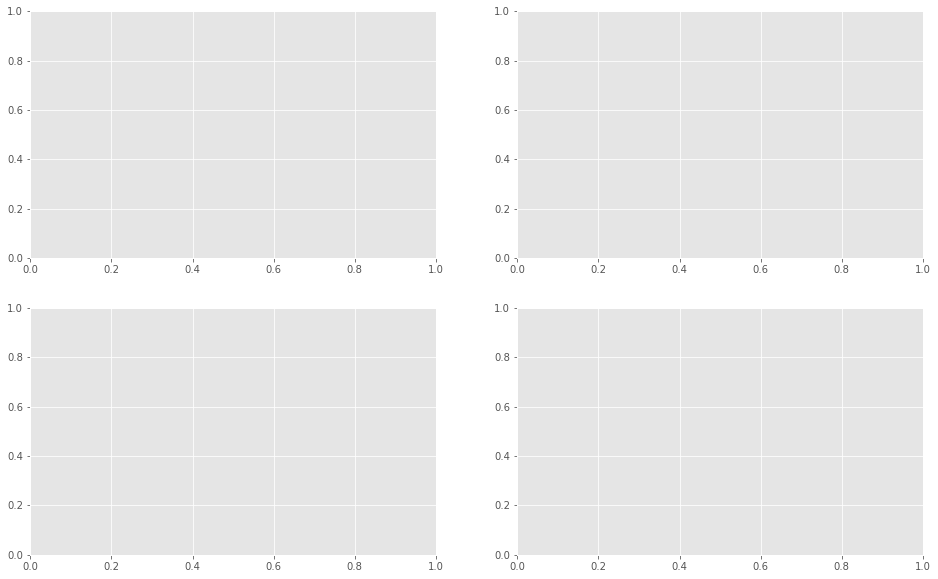

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[16,10])
plt.style.use('ggplot')

df_irs_2 = df_irs_2.filter(['Region THE','Ratio Staff/Student THE'],axis=1)
df_ics_2 = df_ics_2.filter(['Country THE','Ratio Staff/Student THE'],axis=1)
df_iri_2 = df_iri_2.filter(['Region THE','Ratio of International students THE'],axis=1)
df_ici_2 = df_ici_2.filter(['Country THE','Ratio of International students THE'],axis=1)

df_irs_2.plot(ax=axes[0,0], kind='barh')
df_ics_2.plot(ax=axes[0,1], kind='barh')
df_iri_2.plot(ax=axes[1,0], kind='barh')
df_ici_2.plot(ax=axes[1,1], kind='barh')
plt.tight_layout()
plt.show()

# Task 3 - Merging the dataframes

The next goal is to merge the two dataframes that were created in the previous tasks using university names.

We first observe that a straight forward approach based on equality of the names is insufficient, because there might be slight differences in the names. For example, the MIT is referred to as 'Massachusetts Institute of Technology (MIT)' in the Top Universities ranking, while it referred to as 'Massachusetts Institute of Technology' in the Times Higher Education ranking. 

Therefore, we need a more sophisticated method for matching names. We decided to first compute all possible combinations of universities, i.e. the cross product of the two dataframes, and then filter on a refined criterion. For every combination of universities a metric for the similarity between their titles is computed using the `ratio` function provided by the difflib Python standard library. The core functionality of this library is to calculate matching parts in sequences. This is achieved by searching for the longest common subsequence and then recursivly looking for matches left and right of the occurence of this sequence. (This is based on Gestalt pattern matching<sup>1</sup>). 
The ratio of similarity is then computed using the formula 2.0 * M / T where M is the number of matches and T is the sum of the lengths of the two strings. This results in a number between 0 and 1 where 1 means that the two strings are equal. We then define a threshold for the point from which on two names are considered to describe the same university. We set this threshold to be 0.8. The threshold was found by manually checking the quality of the matching.

This approach works well apart from a few exceptions. In particular, there were some mistakes for titles which consist mainly of words which are very common in university names. For example the names 'University of Bern' and 'University of Bonn' would match. Therefore, we decided to further refine our method by deleting those common words from the titles before computing the ratios. We delete the words 'University', 'Institute', 'of', and 'The'.

As it is difficult to create a perfect approximation, there still are some entries in the end which need to be added or deleted manually.  In total the result has 144 rows, where two rows had to be deleted manually and five rows were added manually. We consider this a satisfactory accuracy. 

<sup>1</sup> John W. Ratcliff and David Metzener, Pattern Matching: The Gestalt Approach, Dr. Dobb's Journal, page 46, July 1988. 





#### Removing useless columns from a copy of the original dataframe

In [ ]:
useless_columns_m = ['Stars TU','CC TU','Core_id TU','Guide TU','Nid TU','url TU','Logo TU']
for column in useless_columns_m:
    del results[column]

### Deleting misleading words:

In [ ]:
dict_words = {'University':'','of':'','The':'','Institute':''}

In [ ]:
uni_names_2 = list(result_2['Title THE'])
stripped_names_2 = []
for uni in uni_names_2:
    for i, j in dict_words.items():
        uni = uni.replace(i,j)
    uni=uni.split()
    uni = ' '.join(uni)
    stripped_names_2.append(uni)
    
    

In [ ]:
uni_names_1 = list(results['Title TU'])
stripped_names_1 = []
for uni in uni_names_1:
    for i, j in dict_words.items():
        uni = uni.replace(i,j)
    uni=uni.split()
    uni = ' '.join(uni)
    stripped_names_1.append(uni)

In [ ]:
results['Stripped Names TU'] = stripped_names_1

In [ ]:
result_2['Stripped Names THE'] = stripped_names_2

In [ ]:
results.head()

### Setting the Overall Score in THE dataframe to the same range as the TU frame for fair comparison further on.

In [ ]:
results['Score TU'] = results['Score TU'].astype('float')
OldRange = (max(result_2['Scores overall THE']) - min(result_2['Scores overall THE']))  
NewRange = (max(results['Score TU']) - min(results['Score TU']))
result_2['Scores overall THE'] =  (((result_2['Scores overall THE'] - min(result_2['Scores overall THE'])) * NewRange) / OldRange) +  min(results['Score TU'])                       

In [ ]:
result_2.head()

### Adding similarity metric and filtering:

In [ ]:
from difflib import SequenceMatcher
df_cartesian = pd.merge(results.assign(key=0), result_2.assign(key=0), on='key').drop('key', axis=1)

def similar(row):
    return SequenceMatcher(None, row['Stripped Names TU'],row['Stripped Names THE']).ratio()

df_cartesian['Similarity'] = df_cartesian.apply(similar,axis=1)
df_merged = df_cartesian[df_cartesian.Similarity > 0.80]
df_merged

### Extracting manually the indices of mismatches:

False positives can easily be detected by checking the resulting dataframe. We found two problematic rows, one of them matching 'Northwestern' and 'Northeastern', the other one matching 'Hong Kong Science and Technology' and 'Pohang Science and Technology' (considering the stripped names).

This corresponds to rows with the following information:

In [ ]:
#['Northwestern', 'Northeastern', 0.9166666666666666] index: 5792
#['Hong Kong Science and Technology','Pohang Science and Technology', 0.8524590163934426], index : 5936

The indices of the mismatching entries where retrieved as follows:

In [ ]:
print(df_cartesian[ (df_cartesian['Stripped Names TU'].str.startswith('Northwestern')) & (df_cartesian['Stripped Names THE'].str.startswith('Northeastern'))].index[0])
print(df_cartesian[ (df_cartesian['Stripped Names TU'].str.startswith('Hong Kong Science and Technology')) & (df_cartesian['Stripped Names THE'].str.startswith('Pohang Science and Technology'))].index[0])

For detecting false negatives, we took a look at rows with match results between 0.65 and 0.8:

In [ ]:
df_cartesian[ (df_cartesian['Similarity'] > 0.65)  & (df_cartesian['Similarity'] <= 0.8)]

We found that the rows with the following information should be added:

In [ ]:
#['New York (NYU)', 'New York', 0.7272727272727273], index:10227
#['UCL ( College London)', 'College London ucl', 0.717948717948718], index : 1215
#['KAIST - Korea Advanced Science & Technology','Korea Advanced Science and Technology (KAIST)',0.7727272727272727],
#index : 8095
#['Humboldt-Universität zu Berlin', 'Humboldt Berlin', 0.6666666666666666]. index : 23861
#['New South Wales (UNSW Sydney)', 'New South Wales', 0.6818181818181818], index : 8884

Again, we retrieved the corresponding indices:

In [ ]:
print(df_cartesian[ (df_cartesian['Stripped Names TU'].str.startswith('New York (NYU)')) & (df_cartesian['Stripped Names THE'].str.startswith('New York'))].index[0])
print(df_cartesian[ (df_cartesian['Stripped Names TU'].str.startswith('UCL ( College London)')) & (df_cartesian['Stripped Names THE'].str.startswith('College London'))].index[0])
print(df_cartesian[ (df_cartesian['Stripped Names TU'].str.startswith('KAIST - Korea Advanced Science & Technology')) & (df_cartesian['Stripped Names THE'].str.startswith('Korea Advanced Science and Technology (KAIST)'))].index[0])
print(df_cartesian[ (df_cartesian['Stripped Names TU'].str.startswith('Humboldt-Universität zu Berlin')) & (df_cartesian['Stripped Names THE'].str.startswith('Humboldt Berlin'))].index[0])
print(df_cartesian[ (df_cartesian['Stripped Names TU'].str.startswith('New South Wales (UNSW Sydney)')) & (df_cartesian['Stripped Names THE'].str.startswith('New South Wales'))].index[0])

### Adding and removing the mismatches:

In [ ]:
adding_index = [10227,1215,8095,23861,8884]
removing_index = [5792,5936]

In [ ]:
for index in removing_index:
    df_merged = df_merged.drop(index)

In [ ]:
for index in adding_index:
    df_merged = df_merged.append(df_cartesian.iloc[index])

Before we proceed to the next task, we drop the columns which were just needed for the merging and print the final result.

In [ ]:
del df_merged['Similarity']
del df_merged['Stripped Names THE']
del df_merged['Stripped Names TU']
df_merged

# Task 4 - Exploratory Analysis 

To begin with, we try to find correlations between the different variables by computing the pairwise correlation of the columns. If called without additional arguments, the pandas method 
`corr` computes the standard (Pearson) correlation coefficients. That is, coefficients between -1 and 1 where 1 represents total positive linear correlation, 0 represents no correlation and -1 represents total negative linear correlation. This gives us a good starting point to come up with interesting questions for the further analysis.

In [ ]:
df_merged.corr()

In the rest of our analysis we examine the following questions:
1. When a university is strong in its international dimension, can you observe a consistency both for students and faculty members? (see example in exercise description.)
2. Do international students tend to chose higher raked universities?
3. How similar are the ranks assigned by the two rankings?
4. Is the performance in research related to the performance in teaching?
5. 5. Is the number of universities in the top 200 in a country correlated to:
    - GDP of the country?
    - Billions of USD invested in R&D by the country?

### 1. When a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

In order to answer this question, we consider the correlation between the values 'International Staff number TU' and 'International Students number TU' computed above. Furthermore, we draw a scatter plot to get further insights into the relationship. Note that the analysis is based on the Top Universities ranking. 

In [ ]:
df_merged.plot.scatter(x='International Staff number TU', y='International Students number TU')

*Interpretation:* Between those indicators there exists a medium positive linear relationship, indicating that the number of international staff also increases the number of international students. However, it might be that there is an underlying factor influencing both, e.g. university size, location, teached subjects or international ranking.

### 2. Do international students tend to chose higher raked universities?

For this question we take a closer look at the rank and the ratio of international students provided in the Times Higher Education ranking. We again support our analysis by a scatter plot: 

In [ ]:
df_merged.plot.scatter(x='Rank THE', y='Ratio of International students THE')

*Interpretation:* There is a small negative linear correlation. Note that a smaller rank is higher up, i.e. better. Therefore a negative correlation means that universities higher up in the ranking have a higher ratio of international students. Closer inspection of the scatter plot indicates that this relationship is influenced by outliers, universities that have a high number of international students and small rank. Most noticeable, the London School of Economics and Political Science has a rank of 25 and 71% of international students. Ignoring those outliers, no relationship between these two indicators could be detected.

### 3. How similar are the ranks assigned by the two rankings?

We use the same approach as above to compare the ranks:

In [ ]:
df_merged.plot.scatter(x='Rank TU', y='Rank THE')

*Interpretation:* These variables exhibit a positive medium linear correlation. Especially, universities higher up, i.e. with small rank, in the Top Universities ranking also are higher up in the Times Higher Education ranking, whereas variation in creases with higher rank. There are quite a few universitites where there is a clear discrepancy between the ranks. For example, the University of Minnesota has rank 163 in the Top Universities ranking and rank 56 in the Times Higher Education ranking. A further analysis of this example could provide insights into the different approaches for the rank computation.

### 4. Is the performance in research related to the performance in teaching?

For this analysis we compare the reserch and the teaching score provided by the Times Higher Education ranking.

In [ ]:
df_merged.plot.scatter(x='Score research THE', y='Score teaching THE')

*Interpretation:* These scores are nearly perfectly (positive) linearly correlated, meaning that universities with a high research score show a nearly equally high teaching score. As we do not know how exactly those scores are computed, it is difficult to draw concrete conclusions from this result. Interestingly, as can be concluded from the following scatter plot, there is no clear relationship between the teaching score and the ratio between students and staff.

In [ ]:
df_merged.plot.scatter(x='Score teaching THE', y='Ratio Student/Staff THE')

### 5. Is the number of universities in the top 200 in a country correlated to:
1. GDP of the Country?
2. Billions of USD invested in R&D?

For this analysis we compare the number of universities in the best 200 universities for each country with statistics of GDP per country and billions of USD invested in R&D per country. We also consider GDP and money invested in R&D per-capita.

Since these information is not given on the ranking websites, we scrape this content from three Wikipedia pages:
- https://en.wikipedia.org/wiki/List_of_countries_by_research_and_development_spending
- https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)
- https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita

In [ ]:
from bs4 import BeautifulSoup

import urllib.request as urllib2
wiki = "https://en.wikipedia.org/wiki/List_of_countries_by_research_and_development_spending"
wiki2 = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
wiki3 = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'

header = {'User-Agent': 'Mozilla/5.0'}
req = urllib2.Request(wiki,headers=header)
req2 = urllib2.Request(wiki2,headers=header)
req3 = urllib2.Request(wiki3,headers=header)

page = urllib2.urlopen(req)
page2 = urllib2.urlopen(req2)
page3 = urllib2.urlopen(req3)

soup = BeautifulSoup(page, "lxml")
soup2 = BeautifulSoup(page2, "lxml")
soup3 = BeautifulSoup(page3, "lxml")


country_ef = []
ranking_ef = []
pro_gdp = []

country_gdp = []
ranking_gdp = []

country_pro = []
ranking_pro = []

table = soup.find("table", { "class" : "wikitable sortable" })
table2 = soup2.find("table", { "class" : "wikitable sortable" })    
table3 = soup3.find("table", { "class" : "wikitable sortable" })    

for row in table3.findAll("tr"):
    cells = row.findAll("td")
    if len(cells) == 3:
        country_pro.append(cells[1].find('a').find(text=True))
        ranking_pro.append(cells[2].findAll(text=True)[0])
        
for row in table2.findAll("tr"):
    cells = row.findAll("td")
    if len(cells) == 3:
        country_gdp.append(cells[1].find('a').find(text=True))
        ranking_gdp.append(cells[2].findAll(text=True)[0])
        
for row in table.findAll("tr"):
    cells = row.findAll("td")
    if len(cells) == 7:
        country_ef.append(cells[1].find('a').find(text=True))
        ranking_ef.append(cells[2].findAll(text=True)[0])
        pro_gdp.append(cells[4].findAll(text=True)[0])
    
df_international_by_country_count2 = df_international_by_country_count.copy()

for i, c in enumerate(df_international_by_country_count.index):
    if c in country_gdp:
        df_international_by_country_count2.loc[c, 'GDP per country'] = float(ranking_gdp[country_gdp.index(c)].replace(',',''))
    if c in country_ef:
        df_international_by_country_count2.loc[c, 'Billions of dollars invested in R&D'] = float(ranking_ef[country_ef.index(c)].replace(',',''))
        df_international_by_country_count2.loc[c, 'Dollars per-capita invested in R&D'] = float(pro_gdp[country_ef.index(c)].replace(',',''))
    if c in country_pro:
        df_international_by_country_count2.loc[c, 'GDP per-capita per country'] = float(ranking_pro[country_pro.index(c)].replace(',','').replace('%',''))

        
last_corr_df = df_international_by_country_count2.fillna(95.00).astype(float)
axs1 = last_corr_df.head(100).plot(subplots=True, kind='bar', figsize=[16,10], sharex=True)
axs1[0].set_ylim(0,50)
axs1[0].set_ylabel('Universities in top 200')
axs1[1].set_ylim(100000,8000000)
axs1[1].set_ylabel('Billions US$ invested in R&D')
axs1[2].set_ylim(0, 500)
axs1[2].set_ylabel('GDP US$')

We decided to also do a more thorough analysis. As before we compute the correlation matrix and draw scatter plots.

In [ ]:
last_corr_df.corr()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[16,10])

last_corr_df.plot.scatter(ax=axes[0][0],x='GDP per country',y='Number of Universities per country')
last_corr_df.plot.scatter(ax=axes[0][1],x='Billions of dollars invested in R&D',y='Number of Universities per country')
last_corr_df.plot.scatter(ax=axes[0][2],x='GDP per country',y='Billions of dollars invested in R&D')

last_corr_df.plot.scatter(ax=axes[1][0],x='GDP per-capita per country',y='Number of Universities per country')
last_corr_df.plot.scatter(ax=axes[1][1],x='Dollars per-capita invested in R&D',y='Number of Universities per country')
last_corr_df.plot.scatter(ax=axes[1][2], x='GDP per-capita per country',y='Dollars per-capita invested in R&D')

*Interpretation:* To begin with, we consider the relationship between the number of Top 200 universities and the GDP per country. A strong positive linear relationship is given (rho = 0.7889) from which we might draw the conclusion that quality of universities increases with a country's wealth. However, the GPD per capita draws an entirely different picture. Considering this normalized indicator of a countries wealth it is clear that the number of Top 200 universities within a country is only mildly correlated with its wealth (rho = 0.2997).

Next, we consider the relationship between the number of Top 200 universities and the R&D per country. A strong positive linear relationship is given (rho = 0.6846) from which we might draw the conclusion that quality of universities increases with a country's R&D (AUSGABEN). However, the R&D per capita draws an entirely different picture. Considering this normalized indicator of a countrie's BILDUNGSAUSGABEN it is clear that the number of Top 200 universities within a country is only mildly correlated with its wealth (rho = 0.2546). We therefore conclude that money invested or a countries wealth only mildly influence the universities' quality.

# Task 5 - Finding the best university 

### Looking at the criteria www.topuniversities.com use to rank the universities it is divided in this way :
    1-Academic reputation (40%)
    2-Employer reputation (10%)
    3-Faculty/Student Ratio (20%)
    4-Citations per faculty (20%)
    5-International faculty ratio/International student ratio (5% each)

### Looking at the criteria www.timeshighereducation.com use to rank the universities it is divided in this way :
    1- Teaching - the learning environment (30%)
        -Reputation Survey (15%)
        -Staff to student ratio (4.5%)
        -Doctorate-to-bachelor's ratio (2.25%)
        -Doctorates awarded to academic staff ratio (6%)
        -Institutional Income (2.25%)
    2- Research - Volume, income, and reputation (30%)
        -Reputation Survey (18%)
        -Research income (6%)
        -Research Productivity (6%)
    3- Citations - research influence (30%)
    4- International outlook (7.5%)
        -International to domestic staff ratio (2.5%)
        -International to domestic student ratio (2.5%)
        -International collaboration (2.5%)
    5- Industry income - Knowledge transfer ( 2.5% )

In [ ]:
comp_df = df_merged.filter(['Rank TU','Rank THE','Country TU','Score TU','Scores overall THE','Title TU','Students total number THE','Students total number TU','International Students number TU','International Students number THE','Ratio Staff/Student THE','Ratio Staff/Student TU','Score research THE','Score teaching THE','Ratio Student/Staff THE'],axis=1)

In [ ]:
comp_df.set_index('Title TU').head(6)

#### Excluding other universities the competition for the best university is between the 6 universities listed up, where both ranking systems show that they should be on top 6.
#### Taking into consideration the criteria of ranking listed above, we can see that the TU ranking system contributes 60% of its total to Academic reputation + Citations per faculty, while THE ranking system contributes 90% of its total to Teaching + Research + Citation.
#### Oxford University would be listed as the best university. Checking the dataframe above it is leading in research score and 3rd highest teaching score. Although the high number of students it still maintains the highest student/staff ratio between all of them.
#### Oxford is also the most diverse w.r.t. gender with a  46:54 female to male ratio, and has the highest number of international students. The only reason why Oxford comes 6th in TU ranking system is due to the citation per faculty critereon and we find the division of the Research/Teaching/citation criteria is better constructed in the THE ranking system.